# Text Analytics Assignment 1 MSBA

<HR>

<B>
Group Members:

1. Alisha Fernandes
2. Amey Athaley
3. Apoorva Jasti
4. Jayant Raisinghani
5. Gaurav Chaudhary


<HR>

### 1. Web scraper using Selenium to fetch messages posted in Edmunds.com

<HR>

In [0]:
import sys

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [0]:
import pandas as pd
## calling the chrome function to prepare for web scrapping 
driver = webdriver.Chrome('chromedriver', options=chrome_options)

In [0]:
## Initializing the website we want to scrape from and the xpath element of it which we want to store 
driver.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans')
ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

In [0]:
## Same procedure repeated for specifying the last page
blog_page='https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
driver.get(blog_page)
last_pg_xpath = driver.find_elements_by_xpath("//*[contains(@class,'LastPage')]")

In [0]:
last_page=int(last_pg_xpath[0].text)

In [0]:
last_page

434

In [0]:
## preparing a list of pages we want to scrape data from 
pg_indices=list(range(2,last_page))
pages=[]
for i in pg_indices:
    pages.append(blog_page+"/p"+str(i))
    
pages

['https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p10',
 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p11',
 'https://forums.e

<HR>
    
### 2.  Fetch 5000 posts about cars from a General topics forum. 
URL : https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans

<HR>

In [0]:
comments = pd.DataFrame(columns = ['Date','user_id','comments']) 
for j in pages:
    if(len(comments)==5000):
        break
    print(j)
    print(len(comments))
    driver.get(j)
    comment_ids = []
    ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
    for i in ids:
        comment_ids.append(i.get_attribute('id'))

    
    for x in comment_ids:
        #Extract dates from for each user on a page
        user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
        date = user_date.get_attribute('title')

        #Extract user ids from each user on a page
        userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
        userid = userid_element.text

        #Extract Message for each user on a page
        user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
        comment = user_message.text

        #Adding date, userid and comment for each user in a dataframe    
        comments.loc[len(comments)] = [date,userid,comment]


https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2
0
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3
50
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4
100
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5
150
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6
200
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7
250
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8
300
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9
350
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p10
400
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p11
450
https://forums.edmund

https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p85
4150
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p86
4200
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p87
4250
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p88
4300
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p89
4350
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p90
4400
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p91
4450
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p92
4500
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p93
4550
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p94
4600


In [0]:
len(comments)

5000

In [0]:
comments.head()

,Date,user_id,comments
0,"April 27, 2002 9:54PM",wishnhigh1,The problem is that they are HUGE generalizati...
1,"April 28, 2002 2:38AM",kd6aw1,Have found out that with some of the more powe...
2,"April 28, 2002 10:11AM",fwatson,How does your theory explain English cars? A c...
3,"April 29, 2002 2:59PM",dave330i,"""Being that it is an automatic I can enjoy my ..."
4,"April 29, 2002 5:12PM",blueguydotcom,"He did mention ""in rush hour traffic."" Like th..."


In [0]:
comments.to_csv("Comments_5K.csv",index=False)

<HR>

### 3. Find the top 10 brands from frequency counts.

<HR>

In [0]:
df = comments
brands = pd.read_csv('models (5).csv', header=None)
brands.columns = ['Brand','Model']
brands

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx
5,acura,mdx
6,acura,rdx
7,acura,tsx
8,acura,rsx
9,audi,quattro


In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
 
#Removing punctuations
df["comments_without_punctuations"] = df['comments'].str.replace('[^\w\s]','')

#Convert text to lowercase
df["comments_lowercase"] = df["comments_without_punctuations"].str.lower()

#Removing stop words from comments
stop_words = set(stopwords.words('english')) 

for i in range(len(df)):  
  df['comments_lowercase'][i]=str(df['comments_lowercase'][i])

df['comments_without_stopwords'] = df['comments_lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [0]:
def model_to_brand(s):
    for i in brands.index.values:
        s = s.replace(brands["Model"][i],brands["Brand"][i])
    return s

df['comments_replaced_models']=' '
df['comments_replaced_models'] = df['comments_without_stopwords'].apply(model_to_brand)

In [0]:
#Separating the words in the comments into a list
word=[]
for i in range(len(df)):
  df['comments_replaced_models'][i]=str(df['comments_replaced_models'][i])
  word.append(word_tokenize(df['comments_replaced_models'][i]))

In [0]:
#Making mentions of word unique per respondent
def unique(list1): 
  for j in range(len(list1)): 
# insert the list to the set 
    list_set = set(list1[j]) 
# convert the set to the list 
    word_new[j] = (list(list_set)) 
  return word_new

word_new= list(range(len(word)))
Words=unique(word)

In [0]:
#Counting the freq. of mentions

#Converting list of lists into a single list
Word_final=[]
for i in range(len(Words)):
  Word_final=Word_final+Words[i]

mentions = pd.Series(Word_final)
Datafile = mentions.value_counts().to_frame()

In [0]:
Unique_Brands = brands['Brand'].drop_duplicates().tolist()
Datafile[:500]

,0
car,1986
bmw,1353
cars,1276
like,1260
one,1106
dont,1073
would,1028
get,984
tl,976
think,937


In [0]:
#Getting the most frequently used words
from nltk import FreqDist
word_freq = nltk.FreqDist(Word_final)
top_words = word_freq.most_common(1000)

#Getting the frequency of brands mentioned in the top 1000 words
top_brands = []
for (key, value) in top_words:
    if key in Unique_Brands:
        brandcount = (key, value)
        top_brands.append(brandcount)

In [0]:
top_brands

[('bmw', 1353),
 ('acura', 554),
 ('honda', 426),
 ('audi', 409),
 ('infiniti', 385),
 ('toyota', 309),
 ('nissan', 297),
 ('subaru', 209),
 ('mercedes-benz', 175),
 ('volkswagen', 170),
 ('ford', 136),
 ('volvo', 130),
 ('hyundai', 120),
 ('chevrolet', 104),
 ('cadillac', 103),
 ('mazda', 69),
 ('lincoln', 60),
 ('dodge', 56),
 ('chrysler', 54),
 ('pontiac', 51)]

<HR>
    
### Task A

Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post.Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on the Internet). 

<HR>

In [0]:
# Function to find the lift of any 2 words
def lift(a,b):
    if (a==b):
        return 1
    words = word_new
    n = len(words)
    n_a = len([x for x in words if a in x])
    n_b = len([x for x in words if b in x])
    n_ab = len([x for x in words if (a in x and b in x)])
    #lift = n*n_ab/(n_a*n_b)
    if a == b:
        lift = 1
    elif n_a ==0:
        lift = n*n_ab/(n_b)
    elif n_b == 0:
        lift = n*n_ab/(n_a)
    else:
        lift = n*n_ab/(n_a*n_b)
        
    return float(lift)
    

In [0]:
import numpy as np
# Convert the list of top brands into a dataframe
top_brands = pd.DataFrame(top_brands)
top_brands.columns = ['word','frequency']

def lift_list(N):
   # Chose the top brands according to the input N
    top_brand = top_brands.sort_values(by = 'frequency',
                                       ascending = False).word.head(N)
    # Create an empty dataframe to calculate the lift
    df = pd.DataFrame(columns = ['a','b','lift'])
    # Find the lift for each pair of brands
    for i, a in enumerate(top_brand):
        for j, b in enumerate(top_brand):
            lift_ = lift(a,b)
            df = df.append({'a':a,'b':b,'lift':lift_}, ignore_index=True)
    df_pivot = df.pivot(index = 'a', columns = 'b', values = 'lift')
    df_pivot2 = pd.DataFrame(np.triu(np.array(df_pivot), 1)).replace(0, '')
    return df_pivot


In [0]:
lift_list(10)

b,acura,audi,bmw,honda,infiniti,mercedes-benz,nissan,subaru,toyota,volkswagen
a,,,,,,,,,,
acura,1,2.2508,1.53423,2.56352,3.09438,2.11449,2.27911,2.15916,1.8109,1.80505
audi,2.2508,1,1.72577,1.40615,2.76252,3.42298,1.56413,1.81327,1.22645,4.74615
bmw,1.53423,1.72577,1,1.2752,2.01572,1.98501,1.21939,1.22004,1.4471,1.56515
honda,2.56352,1.40615,1.2752,1,1.40235,1.67673,3.9914,1.51627,3.91236,2.07125
infiniti,3.09438,2.76252,2.01572,1.40235,1,2.89425,2.49246,1.80203,1.09276,2.21543
mercedes-benz,2.11449,3.42298,1.98501,1.67673,2.89425,1,1.6354,1.09364,1.94175,3.36134
nissan,2.27911,1.56413,1.21939,3.9914,2.49246,1.6354,1,1.53046,3.81376,2.6738
subaru,2.15916,1.81327,1.22004,1.51627,1.80203,1.09364,1.53046,1,1.3936,2.53307
toyota,1.8109,1.22645,1.4471,3.91236,1.09276,1.94175,3.81376,1.3936,1,1.99886


In [0]:
# Create an MDS plot

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
%pylab inline


def plot_mds(lift_score,labels):
    dissimilarity = 1/lift_score.astype(np.float64)
    dist = np.array(dissimilarity)
    amax = np.amax(dist)
    dist /= amax
    mds = MDS(n_components=2, random_state=6, metric=False, dissimilarity="precomputed")
    res = mds.fit(dist)
    
    plt.figure(figsize=(12,8))
    plt.scatter(res.embedding_[:,0],res.embedding_[:, 1])

    #plot the brand name labels
    for label, x, y in zip(labels, res.embedding_[:, 0], res.embedding_[:, 1]):
        plt.annotate(label,xy = (x, y), xytext = (-20, 20),textcoords = 'offset points', ha = 'left', va = 'bottom',
                     bbox = dict(boxstyle = 'round,pad=.2', fc = 'green', alpha = 0.6),
                     arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))
    plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['unique']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


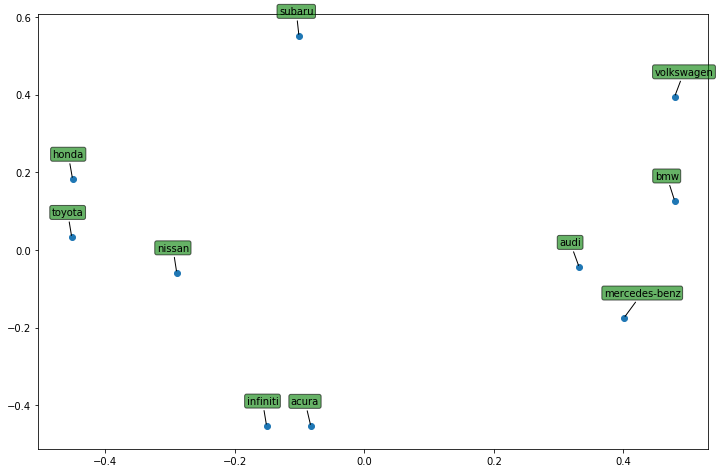

In [0]:
# plot MDS top 10
num_brands = 10
lift_array = [lift(x,y) for x in top_brands[:num_brands].word for y in top_brands[:num_brands].word]
mds_df = reshape(lift_array,(num_brands,num_brands))
plot_mds(mds_df,top_brands.word)

<HR>
    
### Task B:

What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)? 

<HR>

#### <u>Insights to brand managers: </u>
From the above MDS plot, we see that there are 2 clear clusters for the cars. 

The luxury cars - bmw, audi, mercedes-benz and volkswagen are clubbed together. Volkswagen has a closer association to generic cars compared to the other luxury cars mainly due to the Volkswagen Jetta.

Additionally, we see that honda and toyota are very similar to each other while subaru seems to be no part of either group. Here, people mainly compare two specific models - Toyota Camry and Honda Accord, both of which are family cars

<HR>
    
### Task C:

What are 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. You have to make suitable replacements. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

<HR>

In [0]:
top_words_dt = pd.DataFrame(top_words)
top_words_dt.columns = [["Word","Frequency"]]
top_words_dt

,Word,Frequency
0,car,1986
1,bmw,1353
2,cars,1276
3,like,1260
4,one,1106
5,dont,1073
6,would,1028
7,get,984
8,tl,976
9,think,937


In [0]:
top_perf_word = pd.read_csv("Brand Attributes.csv")
print("Following are the top performance words\n")
dfperf = pd.DataFrame(top_perf_word.groupby(['Flag'])['Frequency'].agg(['sum']).sort_values(by = ['sum'], ascending = False)[:5])
dfperf.reset_index(inplace= True)
dfperf.columns = ["Attribute", "Frequency"]
print(dfperf)

print("\n\nFollowing are the top 5 brands:\n")
top_brands_filt = pd.DataFrame(top_brands[0:7])
top_brands_filt.columns = ['Brand','Brand_freq']
top_brands_filt = top_brands_filt.iloc[[0,1,2,3,4],:2].reset_index()
top_brands_filt = top_brands_filt.loc[:5,['Brand','Brand_freq']]
print(top_brands_filt)

Following are the top performance words

     Attribute  Frequency
0  Performance       3238
1      Driving       2812
2        Looks       1062
3        Price        744
4       Luxury        713


Following are the top 5 brands:

      Brand  Brand_freq
0       bmw        1353
1     acura         554
2     honda         426
3      audi         409
4  infiniti         385


In [0]:
top_perf_filt = top_perf_word.merge(dfperf,how='inner', left_on='Flag',right_on= 'Attribute' )
#print(top_perf_filt)
top_perf_filt.columns = ['Word','Word_freq','Flag','Attr','Attr_freq']
#print(top_perf_filt[:2])
top_perf_filt = top_perf_filt.loc[:, ['Word','Word_freq','Attr','Attr_freq']]
print("\n following are the attributes with words \n")
print(top_perf_filt[:5])


 following are the attributes with words 

       Word  Word_freq     Attr  Attr_freq
0     drive        715  Driving       2812
1   driving        551  Driving       2812
2  handling        384  Driving       2812
3    manual        315  Driving       2812
4      auto        206  Driving       2812


In [0]:
top_brands_filt['keys'] = 0
top_perf_filt['keys'] = 0
brand_perf_assoc = top_brands_filt.merge(top_perf_filt, how='outer', on='keys')
brand_perf_assoc_tab = brand_perf_assoc.loc[:, ['Brand','Brand_freq','Word','Word_freq','Attr']]
brand_perf_assoc_tab


,Brand,Brand_freq,Word,Word_freq,Attr
0,bmw,1353,drive,715,Driving
1,bmw,1353,driving,551,Driving
2,bmw,1353,handling,384,Driving
3,bmw,1353,manual,315,Driving
4,bmw,1353,auto,206,Driving
5,bmw,1353,automatic,161,Driving
6,bmw,1353,transmission,151,Driving
7,bmw,1353,steering,130,Driving
8,bmw,1353,steer,116,Driving
9,bmw,1353,handle,83,Driving


In [0]:
import numpy as np
intersectcount = list()
for i in range(len(brand_perf_assoc_tab)):
  test = brand_perf_assoc_tab.loc[i,["Brand","Word"]]
  test2 = np.array(test)
  counter = 0
  for j in range(len(Words)):   
    if test2[0] in Words[j]:
      if test2[1] in Words[j]:
        counter = counter+1 
  intersectcount.append(counter) 

brand_perf_assoc_tab['CommonFreq'] = intersectcount
brand_perf_assoc_tab['Total'] = 5000
brand_perf_assoc_tab

,Brand,Brand_freq,Word,Word_freq,Attr,CommonFreq,Total
0,bmw,1353,drive,715,Driving,263,5000
1,bmw,1353,driving,551,Driving,209,5000
2,bmw,1353,handling,384,Driving,173,5000
3,bmw,1353,manual,315,Driving,99,5000
4,bmw,1353,auto,206,Driving,68,5000
5,bmw,1353,automatic,161,Driving,56,5000
6,bmw,1353,transmission,151,Driving,60,5000
7,bmw,1353,steering,130,Driving,58,5000
8,bmw,1353,steer,116,Driving,32,5000
9,bmw,1353,handle,83,Driving,33,5000


In [0]:
## Calculating individual risks and checking 
print("Following is the risk at individual brand-word level\n")
print("\nWill download this file externally, and look at the individual risk scores of words for each attributes across brands")
brand_perf_assoc_tab["Risk"] = (brand_perf_assoc_tab['CommonFreq']*brand_perf_assoc_tab['Total'])/(brand_perf_assoc_tab['Brand_freq']*brand_perf_assoc_tab['Word_freq'])
brand_perf_assoc_tab


Following is the risk at individual brand-word level


Will download this file externally, and look at the individual risk scores of words for each attributes across brands


,Brand,Brand_freq,Word,Word_freq,Attr,CommonFreq,Total,Risk
0,bmw,1353,drive,715,Driving,263,5000,1.359321
1,bmw,1353,driving,551,Driving,209,5000,1.401738
2,bmw,1353,handling,384,Driving,173,5000,1.664896
3,bmw,1353,manual,315,Driving,99,5000,1.161440
4,bmw,1353,auto,206,Driving,68,5000,1.219871
5,bmw,1353,automatic,161,Driving,56,5000,1.285388
6,bmw,1353,transmission,151,Driving,60,5000,1.468407
7,bmw,1353,steering,130,Driving,58,5000,1.648758
8,bmw,1353,steer,116,Driving,32,5000,1.019446
9,bmw,1353,handle,83,Driving,33,5000,1.469292


In [0]:
#brand_perf_assoc_tab.to_csv("brand_perf_assoc_tab_edit.csv")
brand_perf_assoc_tab_g = brand_perf_assoc_tab.groupby(["Brand","Attr"])['Word_freq',"CommonFreq"].agg('sum')
brand_perf_assoc_tab_g2 = brand_perf_assoc_tab.groupby(["Brand","Attr"])["Brand_freq"].agg('min')
#brand_perf_assoc_tab_g = brand_perf_assoc_tab.groupby(["Brand","Attr"])['Word_freq'].agg('sum')


brand_perf_assoc_tab_g = pd.DataFrame(brand_perf_assoc_tab_g)
brand_perf_assoc_tab_g2 = pd.DataFrame(brand_perf_assoc_tab_g2)
brand_perf_assoc_tab_g['Brand_freq'] = brand_perf_assoc_tab_g2['Brand_freq']
brand_perf_assoc_tab_g = brand_perf_assoc_tab_g.reset_index()
#brand_perf_assoc_tab_g['Total'] = 
brand_perf_assoc_tab_g['total'] = 5000
print("Following is the modified file after iterations")
brand_perf_assoc_tab_g['risk'] = (brand_perf_assoc_tab_g['CommonFreq']*5000)/(brand_perf_assoc_tab_g['Word_freq']*brand_perf_assoc_tab_g['Brand_freq'] )
brand_perf_assoc_tab_g[:5]

Following is the modified file after iterations


,Brand,Attr,Word_freq,CommonFreq,Brand_freq,total,risk
0,acura,Driving,2812,468,554,5000,1.502072
1,acura,Looks,1062,184,554,5000,1.563700
2,acura,Luxury,713,149,554,5000,1.886066
3,acura,Performance,3238,529,554,5000,1.474481
4,acura,Price,744,122,554,5000,1.479950


In [0]:
brand_perf_assoc_tab_grp = brand_perf_assoc_tab_g.groupby(["Attr","Brand"])["risk"].agg(sum).unstack('Brand')
print("following is the resultant Brand Attribute Association table")
brand_perf_assoc_tab_grp

following is the resultant Brand Attribute Association table


Brand,acura,audi,bmw,honda,infiniti
Attr,,,,,
Driving,1.502072,1.508554,1.381210,1.469223,1.404001
Looks,1.563700,1.853310,1.419737,1.668833,1.614205
Luxury,1.886066,1.954619,1.357951,1.712002,1.621100
Performance,1.474481,1.547939,1.393513,1.569537,1.359666
Price,1.479950,1.922470,1.549722,1.798425,1.832845


<HR>
    
### Task D:

What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C? For this assignment, you can assume the sentiment (e.g., that it is positive).

<HR>


From the above observations, following points can be adviced to the product managers and brand managers: 

Product Managers:
<ul>
<LI> We should maintain the price, quality, space and design of Audi as that is what people like about it </li>
<LI> We should maintain the decent price for Audi </li>
<LI> BMW sells on luxury and performance, but surprisingly people are not talking much about it.  Instead they are talking about the price and looks. We can try to improve on interiors, performance and driving to bring it to people </li>
<LI> Infiniti should work on its performance as in comparison people are not talking much about it </li>
</UL>

Marketing Managers:
<UL>
<LI> We should advertise BMW more in terms of Luxury, Performance and Handling so that user's perception change accordingly </LI>
<LI> We should run some programs for infiniti which can highlight its performance and driving </LI> 
       

<HR>
    
### Task E:

Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

<HR>


In order to identify the most aspirational brand in terms of people actually wanting to buy or own, we looked at words and phrases that denote an intent to make a purchase in the future. We read close to 300 comments to identify phrases used for this purpose and identified phrases such as "hope to", "would be happy", "i am considering", "upgrade to", and "inclined to". We replaced these phrases with the word "aspirational" to make it easier to calculate lift values for each brand. We observe that the highest lift value was obtained for Toyota, suggesting that it is the most aspirational car in the dataset.

As Toyota is the most aspirational brand, the marketing teams could monetize this information by looking at ways to incorporate this into advertising campaigns. They could also look at ways to make it easier to make a purchase by offering financing options to potential customers thus luring them away from any competition.

In [0]:
#Copy of comments without removing stop words to replace "aspirational phrases" with the word "aspiration" for easier calculation of lift
df["comments_lowercase_asp"] = df['comments_lowercase']

In [0]:
# Find and replace aspirational phrases
df['comments2_lowercase_asp'] = df.comments_lowercase_asp.replace({'when i get': 'asprational', 'looking at': 'asprational', 'hope to': 'asprational', 'would be happy': 'asprational', 'want to': 'asprational', 'i am considering': 'asprational', 'upgrade to': 'asprational', 'aspire': 'asprational', 'a dream': 'asprational', 'upgrade': 'asprational', 'in the future': 'asprational', 'inclined to': 'asprational', 'someday': 'aspirational'}, regex=True)

In [0]:
#Removing stop words from comments
stop_words = set(stopwords.words('english')) 

for i in range(len(df)):  
  df['comments2_lowercase_asp'][i]=str(df['comments2_lowercase_asp'][i])

df['comments_without_stopwords_asp'] = df['comments2_lowercase_asp'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [0]:
#Replacing model variants with brand name
df['comments_replaced_models_asp'] = ' '
df['comments_replaced_models_asp'] = df['comments_without_stopwords_asp'].apply(model_to_brand)

In [0]:
#Separating the words in the comments into a list

word_asp = []
for i in range(len(df)):
  df['comments_replaced_models_asp'][i]=str(df['comments_replaced_models_asp'][i])
  word_asp.append(word_tokenize(df['comments_replaced_models_asp'][i]))

In [0]:
#Making mentions of word unique per respondent
def unique(list1): 
  for j in range(len(list1)): 
# insert the list to the set 
    list_set = set(list1[j]) 
# convert the set to the list 
    word_new[j] = (list(list_set)) 
  return word_new

word_new= list(range(len(word)))
Words=unique(word)

word_new_asp = list(range(len(word_asp)))
Words_asp = unique(word_asp)

In [0]:
#Counting the freq. of mentions


Word_final_asp=[]
for i in range(len(Words_asp)):
  Word_final_asp = Word_final_asp+Words_asp[i]

mentions_asp = pd.Series(Word_final_asp)
Datafile_asp = mentions_asp.value_counts().to_frame()

In [0]:
#Getting the most frequently used words
from nltk import FreqDist
word_freq_asp = nltk.FreqDist(Word_final_asp)
top_words_asp = word_freq_asp.most_common(1000)

#Getting the frequency of brands mentioned in the top 1000 words
top_brands_asp = []
for (key, value) in top_words_asp:
    if key in Unique_Brands:
        brandcount = (key, value)
        top_brands_asp.append(brandcount)

In [0]:
# Convert the list of top brands into a dataframe
top_brands = pd.DataFrame(top_brands)
top_brands.columns = ['word','frequency']
asp = ['aspirational']

def lift_listB(N):
    # Chose the top brands according to the input N
    top_brand = top_brands.sort_values(by = 'frequency', 
                                       ascending = False).word.head(N)
    # Create an empty dataframe to calculate the lift
    df = pd.DataFrame(columns = ['a','b','lift'])
    
    # Find the lift for each pair of brands
    for i, a in enumerate(top_brand):
        for j, b in enumerate(asp):
            lift_ = lift(a,b)
            df = df.append({'a':a,'b':b,'lift':lift_}, ignore_index=True)
    df_pivot = df.pivot(index = 'a', columns = 'b', values = 'lift')
    return df_pivot

In [0]:
lift_listB(10)

b,aspirational
a,
acura,1.289324
audi,1.746420
bmw,1.583782
honda,0.000000
infiniti,0.000000
mercedes-benz,0.000000
nissan,0.000000
subaru,3.417635
toyota,2.311604
